In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
#Run this cell to make plots look nice
import pylab
global_params = {
    'text.usetex' : False,
    'font.family' : 'serif',
    'font.sans-serif' : ['Helvetica'],
    'ps.usedistiller' : 'xpdf',
    'ps.distiller.res' : 3000,
    'axes.labelsize' : 13,
          #'text.fontsize' : 16,
    'legend.fontsize' : 10,
    'xtick.labelsize' : 12,
    'ytick.labelsize' : 12,
    'axes.linewidth': 2.0,
    'axes.grid':True,  
    'figure.figsize' : [7,5],
    'grid.linestyle':'--',
    'grid.color':'k',
    'grid.alpha':0.1}
pylab.rcParams.update(global_params) 


In this notebook you will explore how different unsupervised learning algorithms operate on the same data set

## Inspect the data

In [28]:
#read in data
data=pd.read_csv('Unsupervised.csv')
data.head(0)

,ZTFID,IAUID,RA,Dec,peakt,peakfilt,peakmag,peakabs,duration,rise,fade,type,redshift,b,A_V


This data comes from a subset of the Bright Transient Survey (BTS) data set [cite this better]. There are only 2 classes, 'SN Ia' and 'SN II' which can be found under the 'type' column. For the guided part of the notebook we will be looking at the peak absolute magnitude ('peakabs') and fade ('fade') features.

In [4]:
import pandas as pd

# Assuming relavant_data is your existing DataFrame
# Example: relavant_data = pd.read_csv('your_data.csv')

# Selecting only the required columns
filtered_data = data[['ZTFID', 'peakabs', 'fade', 'type']]

# Display the resulting DataFrame
print(filtered_data)


            ZTFID  peakabs    fade   type
0    ZTF23abhafym   -18.95   9.280  SN Ia
1    ZTF20actpatx   -19.59  19.200  SN Ia
2    ZTF21aaodljj   -19.22  15.171  SN Ia
3    ZTF18acbyyff   -19.42   2.301  SN Ia
4    ZTF19aaefxwq   -19.22  30.494  SN Ia
..            ...      ...     ...    ...
995  ZTF19aalztms   -17.60  14.993  SN II
996  ZTF18abyvenk   -17.77  38.014  SN II
997  ZTF18aawpwlf   -17.09  17.726  SN II
998  ZTF20aawjbsf   -17.00  18.985  SN II
999  ZTF20acvjlev   -17.47  24.323  SN II

[1000 rows x 4 columns]


Now that the data has been pared down we can explore its structure.

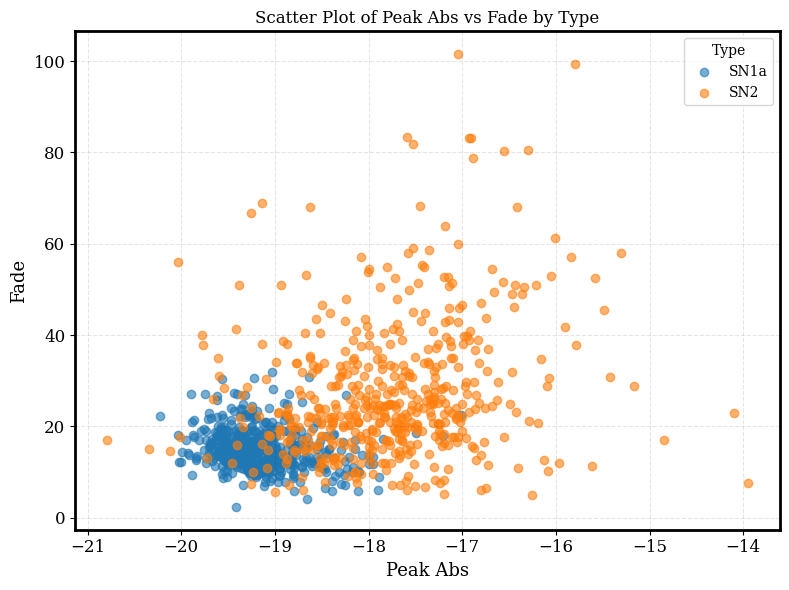

In [7]:
#To do: Make a scatter plot showing each type separately
# Splitting the data into separate DataFrames based on type
SN1a_data = filtered_data[filtered_data['type'] == 'SN Ia']
SN2_data = filtered_data[filtered_data['type'] == 'SN II']

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot for each type
ax.scatter(SN1a_data['peakabs'], SN1a_data['fade'], label='SN1a', alpha=0.6)
ax.scatter(SN2_data['peakabs'], SN2_data['fade'], label='SN2', alpha=0.6)

# Add labels and title
ax.set_xlabel('Peak Abs')
ax.set_ylabel('Fade')
ax.set_title('Scatter Plot of Peak Abs vs Fade by Type')

# Add legend
ax.legend(title='Type')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

By eye we can see that the two classes live in different areas of this plane. SNII tend to have longer fade time and are dimmer (larger peak magnitude). Also SN II have a larger spread compared to SN Ia. If you do not see these trends ask for help from the instructor. 

## Unsupervised learning

Now let's take a dive into the unsupervised learning algorithms! The first thing we should do is scale the data. Let's use the standard scaler provided by sklearn

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming relavant_data is your existing DataFrame
# Example: relavant_data = pd.read_csv('your_data.csv')

# Extract the feature columns ('peakabs' and 'fade') and cast them to floats
feature_data = data[['peakabs', 'fade']].astype(float)

# Initialize the StandardScaler and fit it to the feature data
scaler = StandardScaler().fit(feature_data)

# Transform the feature data using the fitted scaler
scaled_data = scaler.transform(feature_data)

# Convert the scaled data back to a DataFrame for easier handling
scaled_df = pd.DataFrame(scaled_data, columns=['peakabs', 'fade'])

# Display the scaled data
print(scaled_df)


      peakabs      fade
0   -0.504810 -0.945942
1   -1.159557 -0.166239
2   -0.781032 -0.482915
3   -0.985640 -1.494485
4   -0.781032  0.721459
..        ...       ...
995  0.876297 -0.496905
996  0.702380  1.312524
997  1.398049 -0.282094
998  1.490123 -0.183138
999  1.009293  0.236424

[1000 rows x 2 columns]


## Kmeans

In [10]:
from sklearn.cluster import KMeans
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html

The Kmeans algorithms main knob to turn is the number of cluster. Lets see what it looks like to use different number of clusters

In [11]:
#To do: train kemans for 2,5 and 10 clusters

#example
ex_model=KMeans(n_clusters=15) #define a model
ex_model.fit(scaled_data)      #fit the model
ex_model.predict(scaled_data)  #get the classes

c:\Users\Meet\OneDrive\Desktop\Summer 2024\ztf_summer_school_2024\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Meet\OneDrive\Desktop\Summer 2024\ztf_summer_school_2024\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Python312\Lib\subprocess.py", line 1538, 

array([ 7,  3,  3,  7, 14,  3,  9,  3,  3,  3,  9,  3,  3,  3,  3,  0,  7,
        7,  0,  7,  9,  7,  3,  7,  3,  3,  3,  7,  7,  3,  3,  7,  7,  3,
       14,  3,  7,  3,  7,  7,  7,  7,  3,  7,  7,  3,  3,  1,  7,  3,  3,
        7,  3,  3,  7,  7,  7,  7,  9,  3,  5,  9,  3,  0,  7,  3,  7,  3,
        3,  3,  7,  3, 14,  3,  3,  3,  3,  7,  7,  3,  3, 14,  7,  3,  5,
        3,  9,  3,  7,  7,  3,  3,  0,  7,  7,  3,  7,  7,  7,  3,  3,  3,
        3,  0,  3,  3,  3,  3,  7,  7,  3,  3,  9,  9,  7,  0,  3,  7,  9,
        3,  9,  3,  7,  3,  7,  9,  9,  3,  0,  3,  0,  7,  0,  3,  9,  3,
        9,  7,  9,  7,  9,  7,  9,  7, 14, 14,  7,  3,  3,  3,  7,  3, 14,
        0,  3,  3,  9, 14, 14,  3,  7,  7,  7,  3,  3,  3,  3,  7,  3,  7,
        3,  3,  7,  7,  7,  7,  7,  7,  0,  6,  7,  0,  3,  7,  7,  7,  3,
       14,  3,  3,  3,  7,  7,  7,  9,  7,  3, 14,  3,  7,  7,  9,  0,  0,
        7,  0,  7,  3,  3,  7,  7, 14,  3,  9,  0,  9,  3,  1, 14,  3,  9,
        0,  9,  7,  3,  3

Now plot them and compare to the true classes

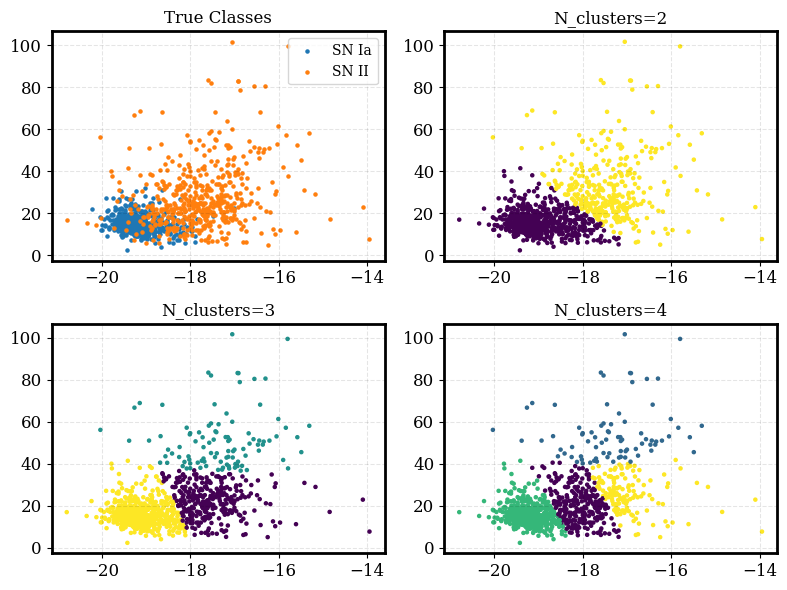

In [13]:
#To do: Plot the true classes and 3 kmeans
#hint: use Kmeans.fit(scaled_data).predict(scaled_data) for your color map
# fig,axs=plt.subplots(2,2,figsize=(8,6))
# axs=axs.flatten()
# axs[0].scatter(SN1a_data['peakabs'],SN1a_data['fade'],label='SN Ia',s=5)
# axs[0].scatter(SN2_data['peakabs'],SN2_data['fade'],label='SN II',s=5)
# axs[0].set_title('True Classes')
# axs[0].legend()
# n_clus=[...]
# for i,model in enumerate(n_clus):
#     axs[i+1].scatter(feature_data['peakabs'],feature_data['fade'],c=...)
#     axs[i+1].set_title(f'N_cluster={n_clus[i]}')
# plt.tight_layout()

# Create the plot
fig, axs = plt.subplots(2, 2, figsize=(8, 6))
axs = axs.flatten()

# Plot the true classes
axs[0].scatter(SN1a_data['peakabs'], SN1a_data['fade'], label='SN Ia', s=5)
axs[0].scatter(SN2_data['peakabs'], SN2_data['fade'], label='SN II', s=5)
axs[0].set_title('True Classes')
axs[0].legend()

# Define the number of clusters to use in KMeans
n_clus = [2, 3, 4]

# Plot KMeans results for different numbers of clusters
for i, n_clusters in enumerate(n_clus):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit(scaled_data).predict(scaled_data)
    
    axs[i + 1].scatter(feature_data['peakabs'], feature_data['fade'], c=cluster_labels, cmap='viridis', s=5)
    axs[i + 1].set_title(f'N_clusters={n_clusters}')

plt.tight_layout()
plt.show()

How does it look? Can we determine the number of clusters systematically? KMeans is not well equipped to answer this question, keep this in mind for Gaussian Mixture

## DBSCAN

In [14]:
from sklearn.cluster import DBSCAN
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

DBSCAN does not take a number of clusters as a parameter. Instead it has epsilon and min samples as tunable parameters.

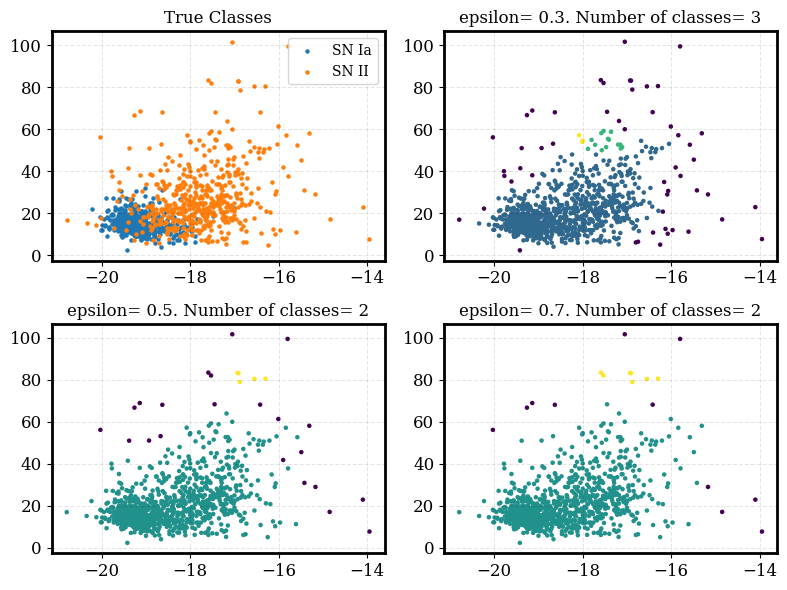

In [15]:
# #To do: Test a few different epsilon values and find out how many classes are created
# fig,axs=plt.subplots(2,2,figsize=(8,6))
# axs=axs.flatten()
# axs[0].scatter(SN1a_data['peakabs'],SN1a_data['fade'],label='SN Ia',s=5)
# axs[0].scatter(SN2_data['peakabs'],SN2_data['fade'],label='SN II',s=5)
# axs[0].set_title('True Classes')
# axs[0].legend()

# epsilons=[...] #pick 3 values here

# for i,eps in enumerate(epsilons):
#     model=DBSCAN(...) #keep min_samples as the default
#     model.fit(...)
#     axs[i].scatter(feature_data['peakabs'],feature_data['fade'],c=model.predict(scaled_data),s=5)
#     axs[i].set_title(f'epsilon= {eps}. Number of classes= {...}')

# Create the plot
fig, axs = plt.subplots(2, 2, figsize=(8, 6))
axs = axs.flatten()

# Plot the true classes
axs[0].scatter(SN1a_data['peakabs'], SN1a_data['fade'], label='SN Ia', s=5)
axs[0].scatter(SN2_data['peakabs'], SN2_data['fade'], label='SN II', s=5)
axs[0].set_title('True Classes')
axs[0].legend()

# Define epsilon values to test
epsilons = [0.3, 0.5, 0.7]

# Plot DBSCAN results for different epsilon values
for i, eps in enumerate(epsilons):
    model = DBSCAN(eps=eps)  # keep min_samples as the default
    model.fit(scaled_data)
    labels = model.labels_
    
    n_classes = len(set(labels)) - (1 if -1 in labels else 0)  # number of clusters, ignoring noise if present

    axs[i + 1].scatter(feature_data['peakabs'], feature_data['fade'], c=labels, cmap='viridis', s=5)
    axs[i + 1].set_title(f'epsilon= {eps}. Number of classes= {n_classes}')

plt.tight_layout()
plt.show()


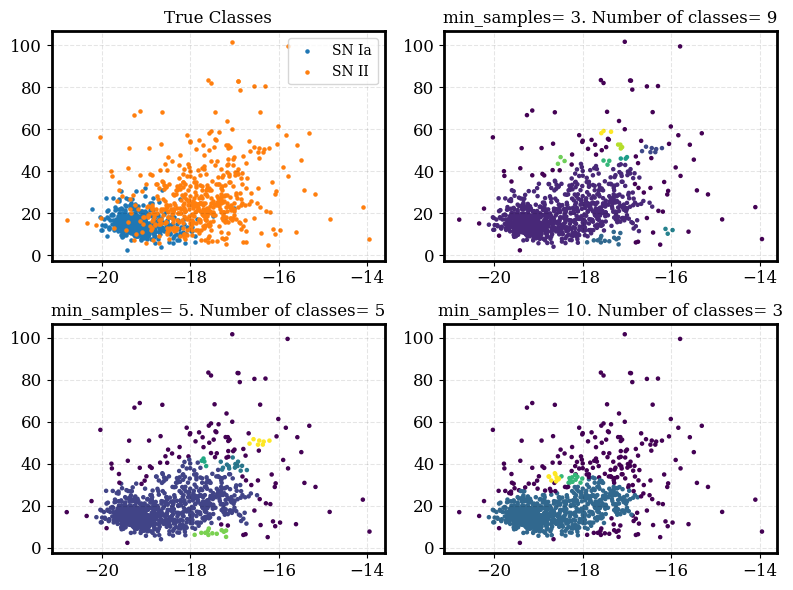

In [16]:
#To do: Now do the same but vary min samples. Keep eps=0.2

# Create the plot
fig, axs = plt.subplots(2, 2, figsize=(8, 6))
axs = axs.flatten()

# Plot the true classes
axs[0].scatter(SN1a_data['peakabs'], SN1a_data['fade'], label='SN Ia', s=5)
axs[0].scatter(SN2_data['peakabs'], SN2_data['fade'], label='SN II', s=5)
axs[0].set_title('True Classes')
axs[0].legend()

# Define min_samples values to test
min_samples_list = [3, 5, 10]

# Plot DBSCAN results for different min_samples values
for i, min_samples in enumerate(min_samples_list):
    model = DBSCAN(eps=0.2, min_samples=min_samples)
    model.fit(scaled_data)
    labels = model.labels_
    
    n_classes = len(set(labels)) - (1 if -1 in labels else 0)  # number of clusters, ignoring noise if present

    axs[i + 1].scatter(feature_data['peakabs'], feature_data['fade'], c=labels, cmap='viridis', s=5)
    axs[i + 1].set_title(f'min_samples= {min_samples}. Number of classes= {n_classes}')

plt.tight_layout()
plt.show()

Changing epsilon and minimum samples can dramaticly change the outcome. Now lets do some bad science and try to pick epsilon and minimum samples to match our data! (this is for academic purposes only).

Since the density of the two classes differ DBSCAN is not ideal for this data set.

## Gaussian Mixture Model

In [17]:
from sklearn.mixture import GaussianMixture
# https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture

One advantage that Gaussian Mixture Model (GMM) has is its statistical basis. This implementaion of GMM has built in functions for the Bayesian and Akaike information criterion (BIC and AIC). These give you an idea of how good the model is. We can use this to determine how many clusters we should choose!

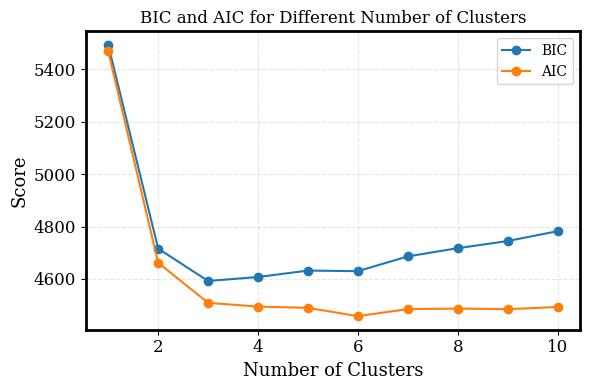

In [19]:
# To do: Compute and Plot the BIC and AIC for a variety of cluster numbers
# number_of_clusters=[1,2,3,4,5,6,7,8,9,10]
# bic=[]
# aic=[]
# #example
# example_model=GaussianMixture(n_components=1).fit(scaled_data)
# ex_bic=example_model.bic(scaled_data)
# ex_aic=example_model.aic(scaled_data)

# fig,ax=plt.subplots(figsize=(6,4))
# ax.plot(number_of_clusters,bic,label='BIC',marker='o')
# ax.plot(number_of_clusters,aic,label='AIC',marker='o')
# ax.legend()
# plt.tight_layout()

# Transform the feature data using the fitted scaler
scaled_data = scaler.transform(feature_data)

# Define the range of cluster numbers to evaluate
number_of_clusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Initialize lists to store BIC and AIC values
bic = []
aic = []

# Compute BIC and AIC for each number of clusters
for n_clusters in number_of_clusters:
    model = GaussianMixture(n_components=n_clusters, random_state=0).fit(scaled_data)
    bic.append(model.bic(scaled_data))
    aic.append(model.aic(scaled_data))

# Plot BIC and AIC values
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(number_of_clusters, bic, label='BIC', marker='o')
ax.plot(number_of_clusters, aic, label='AIC', marker='o')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Score')
ax.set_title('BIC and AIC for Different Number of Clusters')
ax.legend()
plt.tight_layout()
plt.show()

In the plot we can see that the BIC is minimum at 3 and the AIC starts to get diminishing returns at 3. So this tells us that the number of cluster is probably 2,3 or 4.(If you don't see this ask for help) Now let's fit for those parameters and see what it looks like.

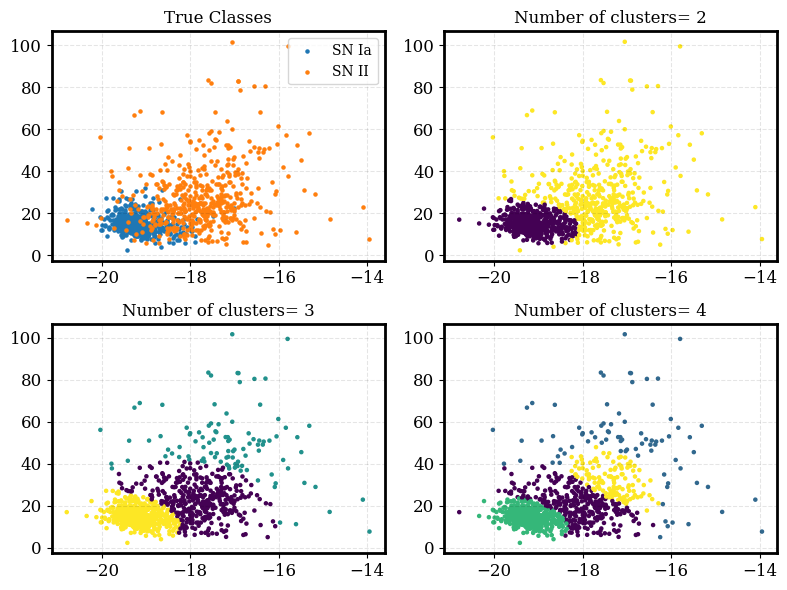

In [20]:
#To do: Plot gmm models for 2,3 and 4 clusters.
# fig,axs=plt.subplots(2,2,figsize=(8,6))
# axs=axs.flatten()
# axs[0].scatter(SN1a_data['peakabs'],SN1a_data['fade'],label='SN Ia',s=5)
# axs[0].scatter(SN2_data['peakabs'],SN2_data['fade'],label='SN II',s=5)
# axs[0].set_title('True Classes')
# axs[0].legend()

# number_of_clusters=[...] 

# for i,n_clus in enumerate(number_of_clusters):
#     model=GaussianMixture(n_components=...)
#     model.fit(...)
#     axs[i+1].scatter(feature_data['peakabs'],feature_data['fade'],c=model.predict(scaled_data),s=5)
#     axs[i+1].set_title(f' Number of clusters= {n_clus}')
# plt.tight_layout()

# Create the plot
fig, axs = plt.subplots(2, 2, figsize=(8, 6))
axs = axs.flatten()

# Plot the true classes
axs[0].scatter(SN1a_data['peakabs'], SN1a_data['fade'], label='SN Ia', s=5)
axs[0].scatter(SN2_data['peakabs'], SN2_data['fade'], label='SN II', s=5)
axs[0].set_title('True Classes')
axs[0].legend()

# Define the number of clusters to evaluate
number_of_clusters = [2, 3, 4]

# Plot GMM results for different number of clusters
for i, n_clus in enumerate(number_of_clusters):
    model = GaussianMixture(n_components=n_clus, random_state=0)
    model.fit(scaled_data)
    labels = model.predict(scaled_data)
    
    axs[i + 1].scatter(feature_data['peakabs'], feature_data['fade'], c=labels, cmap='viridis', s=5)
    axs[i + 1].set_title(f'Number of clusters= {n_clus}')

plt.tight_layout()
plt.show()

2 clusters doesn't look too bad! Now let's try to extract the gaussians from the model

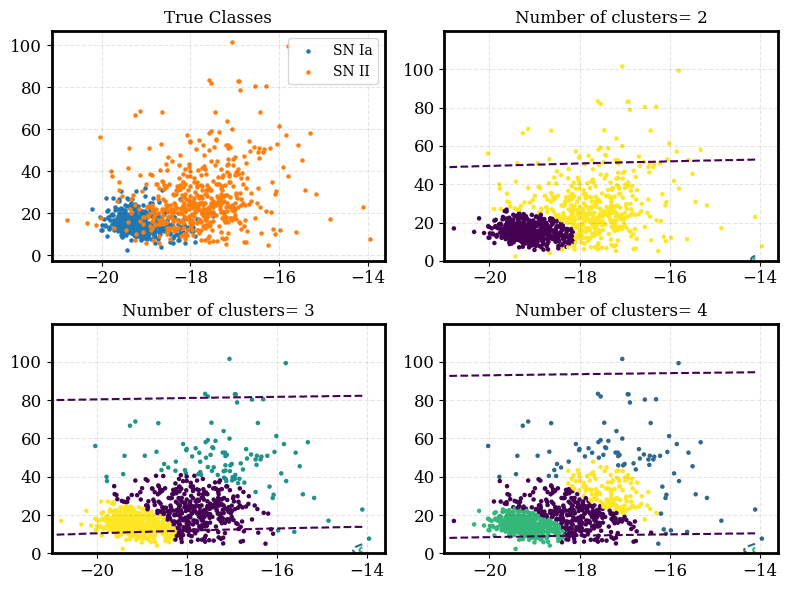

In [21]:
#function to plot a contour
def plot_contour(ax,center,cov,lvls=3,cmap='viridis'):
    '''
    ax:     matplotlib axis that you want the contour to be plotted on
    center: array of mean of gaussian [x_mean,ymean]
    cov:    covariance matrix
    sig:    int, number of contours to plot
    cmap:   Matplotlib color map
    '''
    x = np.arange(-21, -14, .1)
    y = np.arange(0, 120, .1)
    X, Y = np.meshgrid(x, y)
    xhat=center[0]
    yhat=center[1]
    sigx=cov[0][0]
    sigy=cov[1][1]
    A=(X-xhat)**2/((2*sigx)**2) #Ignoring covariance
    B=(Y-yhat)**2/(2*sigy**2)
    Z=np.exp(-(A+B))
    ax.contour(X, Y, Z,levels=lvls-1,linestyles='dashed',cmap=cmap)

# Create the plot
fig, axs = plt.subplots(2, 2, figsize=(8, 6))
axs = axs.flatten()

# Plot the true classes
axs[0].scatter(SN1a_data['peakabs'], SN1a_data['fade'], label='SN Ia', s=5)
axs[0].scatter(SN2_data['peakabs'], SN2_data['fade'], label='SN II', s=5)
axs[0].set_title('True Classes')
axs[0].legend()

# Define the number of clusters to evaluate
number_of_clusters = [2, 3, 4]

# Plot GMM results for different number of clusters
for i, n_clus in enumerate(number_of_clusters):
    model = GaussianMixture(n_components=n_clus, random_state=0)
    model.fit(scaled_data)
    labels = model.predict(scaled_data)
    
    axs[i + 1].scatter(feature_data['peakabs'], feature_data['fade'], c=labels, cmap='viridis', s=5)
    axs[i + 1].set_title(f'Number of clusters= {n_clus}')
    
    # Extract means and covariances
    means = model.means_
    covariances = model.covariances_
    
    # Plot contours for each Gaussian component
    for mean, cov in zip(means, covariances):
        plot_contour(axs[i + 1], mean, cov)

plt.tight_layout()
plt.show()

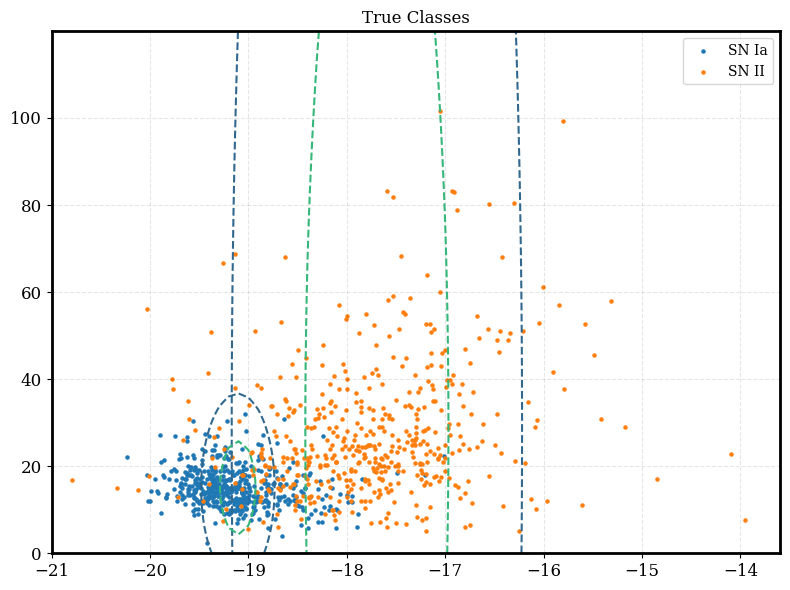

In [22]:
# #To do: Plot the contours of the gaussians found by the model over the data
# fig,ax=plt.subplots(figsize=(8,6))
# model=GaussianMixture(n_components=...).fit(feature_data) #Use feature data instead of scaled data 
# mean=...
# cov=...
# ax.scatter(SN1a_data['peakabs'],SN1a_data['fade'],label='SN Ia',s=5)
# ax.scatter(SN2_data['peakabs'],SN2_data['fade'],label='SN II',s=5)
# ax.set_title('True Classes')
# plot_contour(...)
# plot_contour(...)
# ax.legend()


# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Fit the Gaussian Mixture Model
model = GaussianMixture(n_components=2, random_state=0).fit(feature_data)
means = model.means_
covariances = model.covariances_

# Plot the true classes
ax.scatter(SN1a_data['peakabs'], SN1a_data['fade'], label='SN Ia', s=5)
ax.scatter(SN2_data['peakabs'], SN2_data['fade'], label='SN II', s=5)
ax.set_title('True Classes')
ax.legend()

# Plot contours for each Gaussian component
for mean, cov in zip(means, covariances):
    plot_contour(ax, mean, cov)

plt.tight_layout()
plt.show()

## Wrap up

Here is a plot showing all 3 algorithms at once. I hope you all have learned when each one can be used as well as the advantages and disadvantages of each!

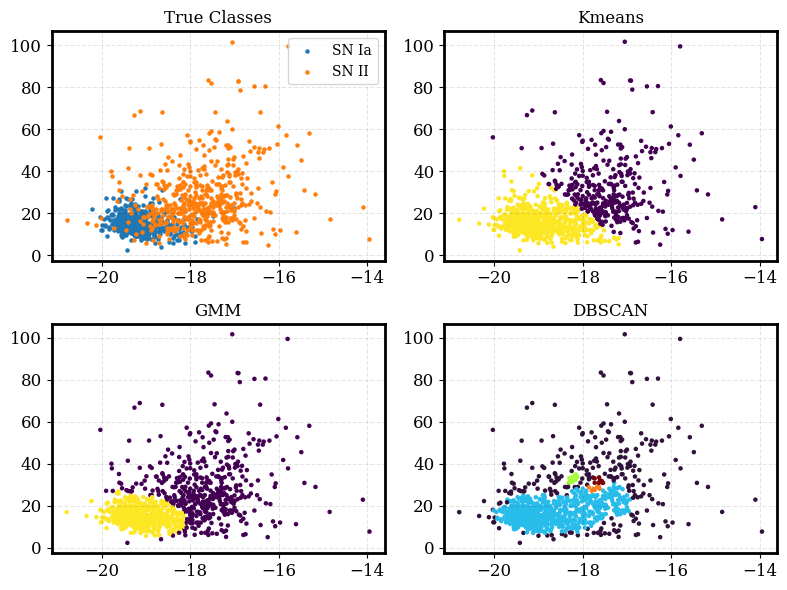

In [23]:
fig,axs=plt.subplots(2,2,figsize=(8,6))
axs=axs.flatten()
axs[0].scatter(SN1a_data['peakabs'],SN1a_data['fade'],label='SN Ia',s=5)
axs[0].scatter(SN2_data['peakabs'],SN2_data['fade'],label='SN II',s=5)
axs[0].set_title('True Classes')
axs[0].legend()


kmeans_model=KMeans(n_clusters=2).fit(scaled_data)
axs[1].scatter(feature_data['peakabs'],feature_data['fade'],c=kmeans_model.predict(scaled_data),s=5)
axs[1].set_title('Kmeans')



gmm_model=GaussianMixture(n_components=2).fit(scaled_data)
axs[2].scatter(feature_data['peakabs'],feature_data['fade'],c=gmm_model.predict(scaled_data),s=5)
axs[2].set_title('GMM')

db=DBSCAN(eps=0.15,min_samples=7).fit(scaled_data)
axs[3].scatter(feature_data['peakabs'],feature_data['fade'],c=db.labels_,s=5,cmap='turbo')
axs[3].set_title('DBSCAN')
plt.tight_layout()

## Bonus
Try your hand at these 2 things! 
1) Compute an accuracy for the various methods. Typically, you wouldn't know the classes in an unsupervised problem but we do here. See how they performed! 
2) Use different "important" features and see what they look like.

Accuracy: 0.88


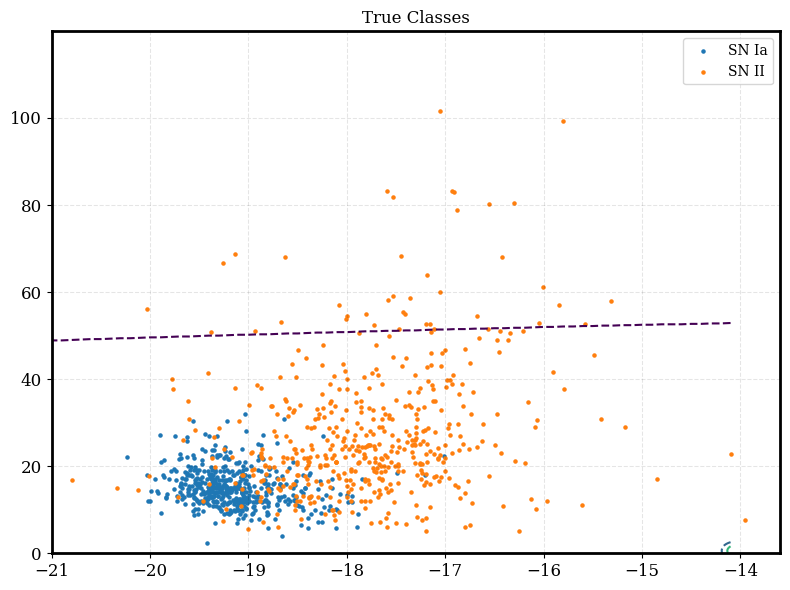

Accuracy with different features: 0.88


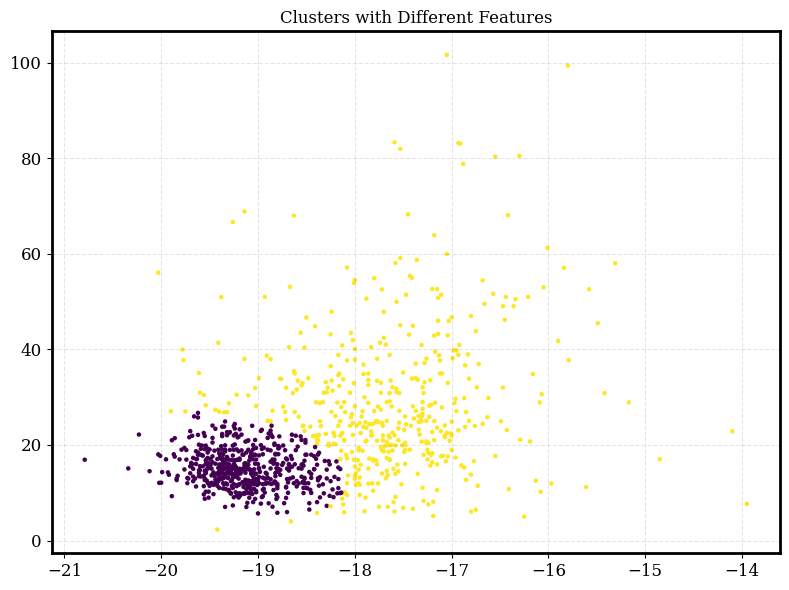

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from scipy.optimize import linear_sum_assignment

# Function to plot a contour
def plot_contour(ax, center, cov, lvls=3, cmap='viridis'):
    x = np.arange(-21, -14, .1)
    y = np.arange(0, 120, .1)
    X, Y = np.meshgrid(x, y)
    xhat = center[0]
    yhat = center[1]
    sigx = cov[0][0]
    sigy = cov[1][1]
    A = (X - xhat) ** 2 / ((2 * sigx) ** 2)  # Ignoring covariance
    B = (Y - yhat) ** 2 / (2 * sigy ** 2)
    Z = np.exp(-(A + B))
    ax.contour(X, Y, Z, levels=lvls - 1, linestyles='dashed', cmap=cmap)

# Load and prepare data
# Example: relavant_data = pd.read_csv('your_data.csv')
filtered_data = data[['ZTFID', 'peakabs', 'fade', 'type']]
feature_data = filtered_data[['peakabs', 'fade']].astype(float)

# Encode true labels as integers
true_labels = filtered_data['type'].map({'SN Ia': 0, 'SN II': 1}).values

# Scale the feature data
scaler = StandardScaler().fit(feature_data)
scaled_data = scaler.transform(feature_data)

# Fit Gaussian Mixture Model
model = GaussianMixture(n_components=2, random_state=0).fit(scaled_data)
predicted_labels = model.predict(scaled_data)

# Compute accuracy using best alignment
def compute_accuracy(true_labels, predicted_labels):
    # Compute confusion matrix
    D = np.zeros((2, 2), dtype=int)
    for i in range(len(true_labels)):
        D[true_labels[i], predicted_labels[i]] += 1
    # Find the best alignment using the Hungarian algorithm
    row_ind, col_ind = linear_sum_assignment(-D)
    return D[row_ind, col_ind].sum() / len(true_labels)

accuracy = compute_accuracy(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

# Plot true classes and GMM clusters
fig, ax = plt.subplots(figsize=(8, 6))
SN1a_data = filtered_data[filtered_data['type'] == 'SN Ia']
SN2_data = filtered_data[filtered_data['type'] == 'SN II']

ax.scatter(SN1a_data['peakabs'], SN1a_data['fade'], label='SN Ia', s=5)
ax.scatter(SN2_data['peakabs'], SN2_data['fade'], label='SN II', s=5)
ax.set_title('True Classes')
ax.legend()

means = model.means_
covariances = model.covariances_

for mean, cov in zip(means, covariances):
    plot_contour(ax, mean, cov)

plt.tight_layout()
plt.show()

# Use different "important" features
# Example with 'feature1' and 'feature2' (replace with actual feature names)
important_features = filtered_data[['peakabs', 'fade']]  # Change to different features if available

scaler = StandardScaler().fit(important_features)
scaled_features = scaler.transform(important_features)

# Fit and predict with Gaussian Mixture Model
model = GaussianMixture(n_components=2, random_state=0).fit(scaled_features)
predicted_labels = model.predict(scaled_features)

# Compute accuracy with new features
accuracy = compute_accuracy(true_labels, predicted_labels)
print(f"Accuracy with different features: {accuracy:.2f}")

# Plot clusters with different features
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(important_features['peakabs'], important_features['fade'], c=predicted_labels, cmap='viridis', s=5)
ax.set_title('Clusters with Different Features')
plt.tight_layout()
plt.show()


Accuracy with peakmag and duration: 0.50


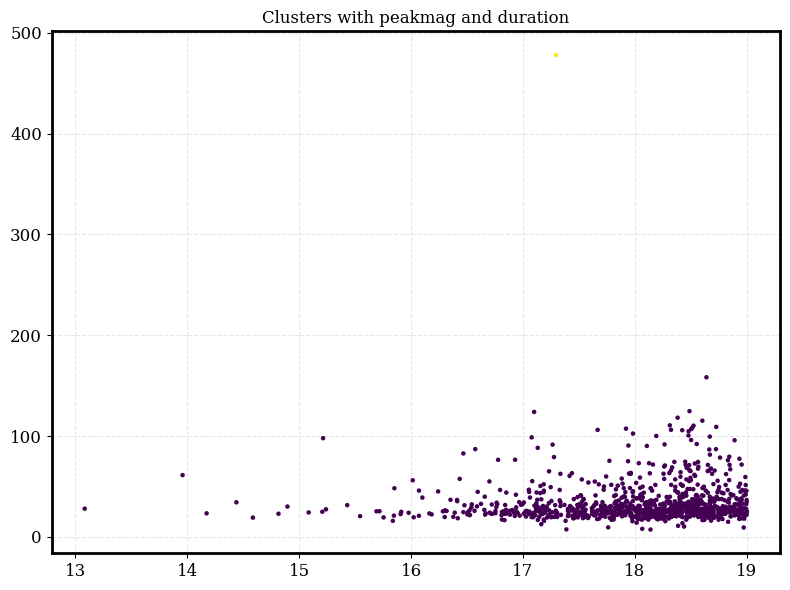

Accuracy with duration and rise: 0.50


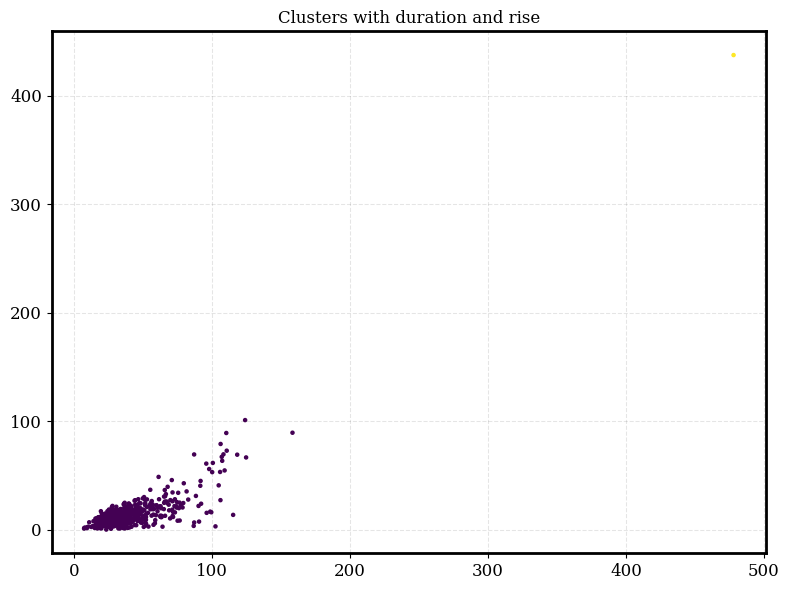

Accuracy with peakabs and fade: 0.88


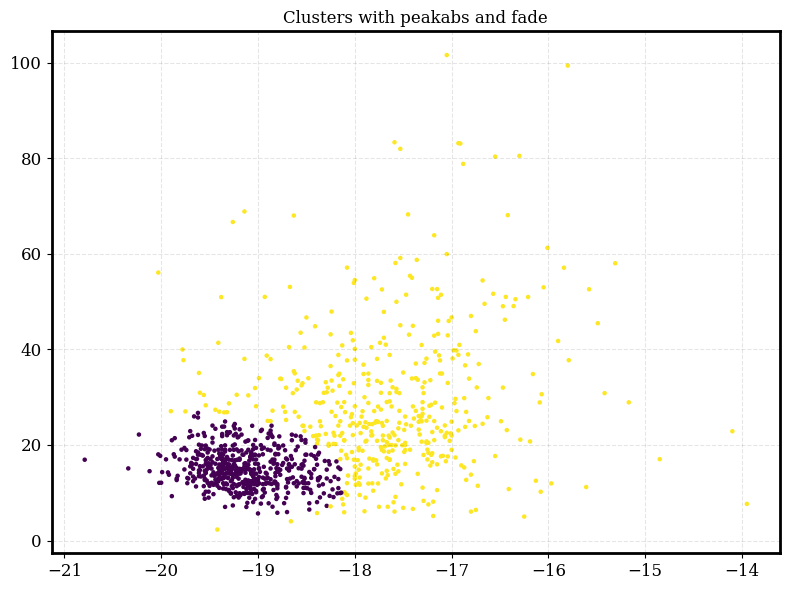

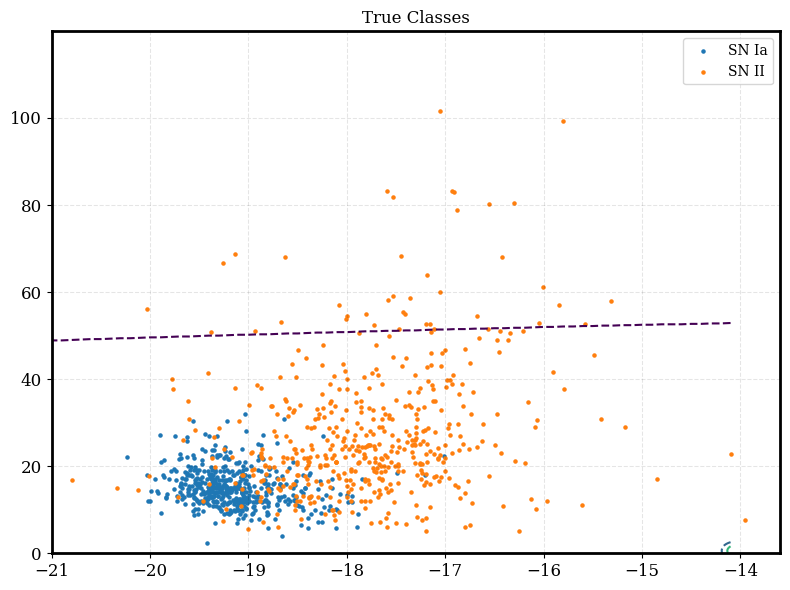

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from scipy.optimize import linear_sum_assignment

# Function to plot a contour
def plot_contour(ax, center, cov, lvls=3, cmap='viridis'):
    x = np.arange(-21, -14, .1)
    y = np.arange(0, 120, .1)
    X, Y = np.meshgrid(x, y)
    xhat = center[0]
    yhat = center[1]
    sigx = cov[0][0]
    sigy = cov[1][1]
    A = (X - xhat) ** 2 / ((2 * sigx) ** 2)  # Ignoring covariance
    B = (Y - yhat) ** 2 / (2 * sigy ** 2)
    Z = np.exp(-(A + B))
    ax.contour(X, Y, Z, levels=lvls - 1, linestyles='dashed', cmap=cmap)

# Load and prepare data
# Example: relavant_data = pd.read_csv('your_data.csv')
filtered_data = data[['ZTFID', 'peakabs', 'fade', 'type', 'peakmag', 'duration', 'rise']]

# Encode true labels as integers
true_labels = filtered_data['type'].map({'SN Ia': 0, 'SN II': 1}).values

# Function to compute accuracy using best alignment
def compute_accuracy(true_labels, predicted_labels):
    D = np.zeros((2, 2), dtype=int)
    for i in range(len(true_labels)):
        D[true_labels[i], predicted_labels[i]] += 1
    row_ind, col_ind = linear_sum_assignment(-D)
    return D[row_ind, col_ind].sum() / len(true_labels)

# Function to fit GMM and compute accuracy for given features
def fit_gmm_and_plot(features):
    scaler = StandardScaler().fit(features)
    scaled_features = scaler.transform(features)
    model = GaussianMixture(n_components=2, random_state=0).fit(scaled_features)
    predicted_labels = model.predict(scaled_features)
    accuracy = compute_accuracy(true_labels, predicted_labels)
    return model, predicted_labels, accuracy

# Mode 1: peakmag and duration
important_features_1 = filtered_data[['peakmag', 'duration']].astype(float)
model_1, predicted_labels_1, accuracy_1 = fit_gmm_and_plot(important_features_1)
print(f"Accuracy with peakmag and duration: {accuracy_1:.2f}")

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(important_features_1['peakmag'], important_features_1['duration'], c=predicted_labels_1, cmap='viridis', s=5)
ax.set_title('Clusters with peakmag and duration')
plt.tight_layout()
plt.show()

# Mode 2: duration and rise
important_features_2 = filtered_data[['duration', 'rise']].astype(float)
model_2, predicted_labels_2, accuracy_2 = fit_gmm_and_plot(important_features_2)
print(f"Accuracy with duration and rise: {accuracy_2:.2f}")

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(important_features_2['duration'], important_features_2['rise'], c=predicted_labels_2, cmap='viridis', s=5)
ax.set_title('Clusters with duration and rise')
plt.tight_layout()
plt.show()

# Mode 3: peakabs and fade
important_features_3 = filtered_data[['peakabs', 'fade']].astype(float)
model_3, predicted_labels_3, accuracy_3 = fit_gmm_and_plot(important_features_3)
print(f"Accuracy with peakabs and fade: {accuracy_3:.2f}")

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(important_features_3['peakabs'], important_features_3['fade'], c=predicted_labels_3, cmap='viridis', s=5)
ax.set_title('Clusters with peakabs and fade')
plt.tight_layout()
plt.show()

# Plot true classes and GMM clusters with contours for the best model
fig, ax = plt.subplots(figsize=(8, 6))
SN1a_data = filtered_data[filtered_data['type'] == 'SN Ia']
SN2_data = filtered_data[filtered_data['type'] == 'SN II']

ax.scatter(SN1a_data['peakabs'], SN1a_data['fade'], label='SN Ia', s=5)
ax.scatter(SN2_data['peakabs'], SN2_data['fade'], label='SN II', s=5)
ax.set_title('True Classes')
ax.legend()

means = model_3.means_
covariances = model_3.covariances_

for mean, cov in zip(means, covariances):
    plot_contour(ax, mean, cov)

plt.tight_layout()
plt.show()


Accuracy with ('peakmag', 'peakabs'): 0.86


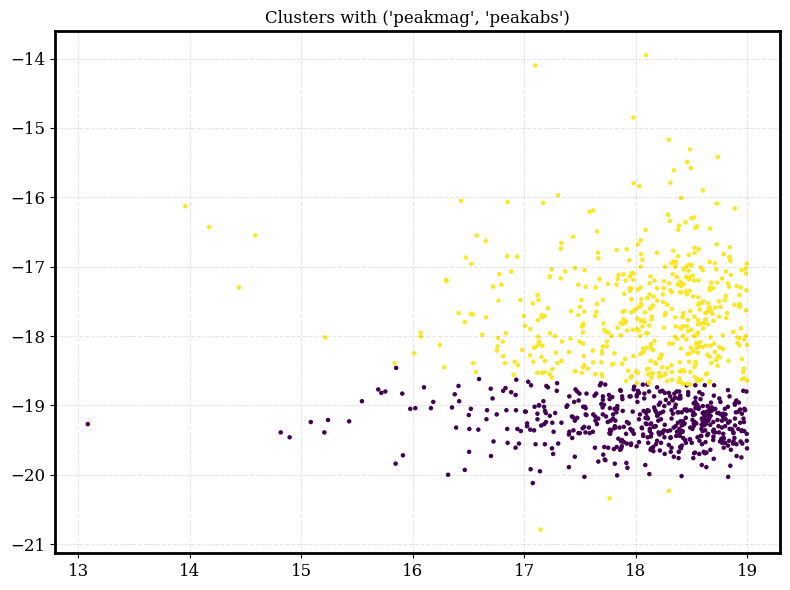

Accuracy with ('peakmag', 'duration'): 0.50


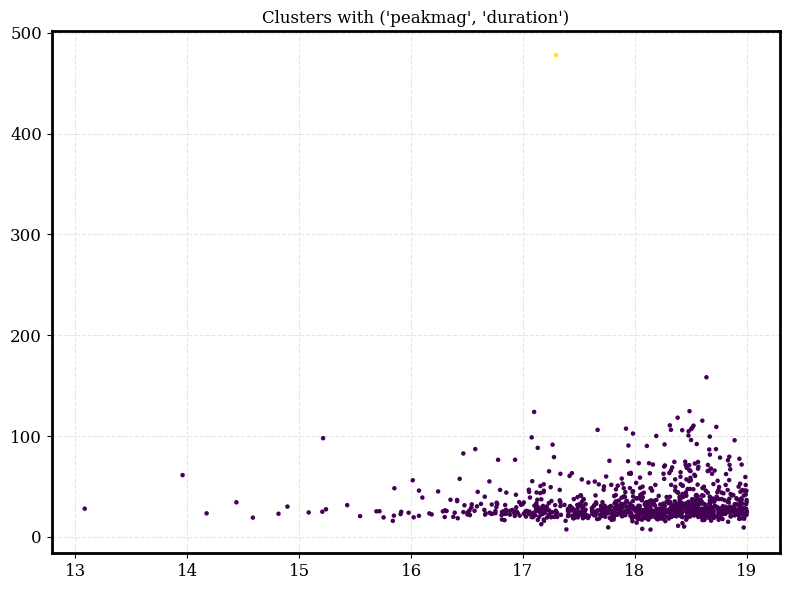

Accuracy with ('peakmag', 'rise'): 0.50


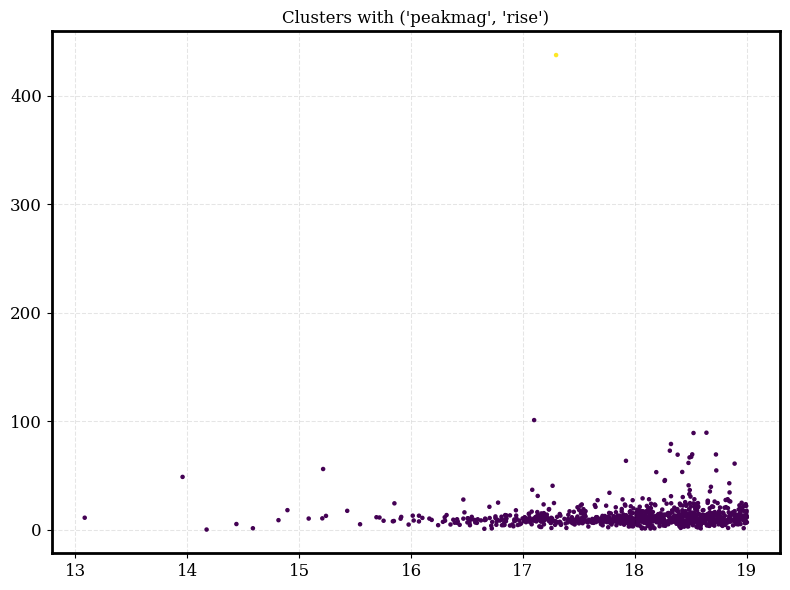

Accuracy with ('peakmag', 'fade'): 0.69


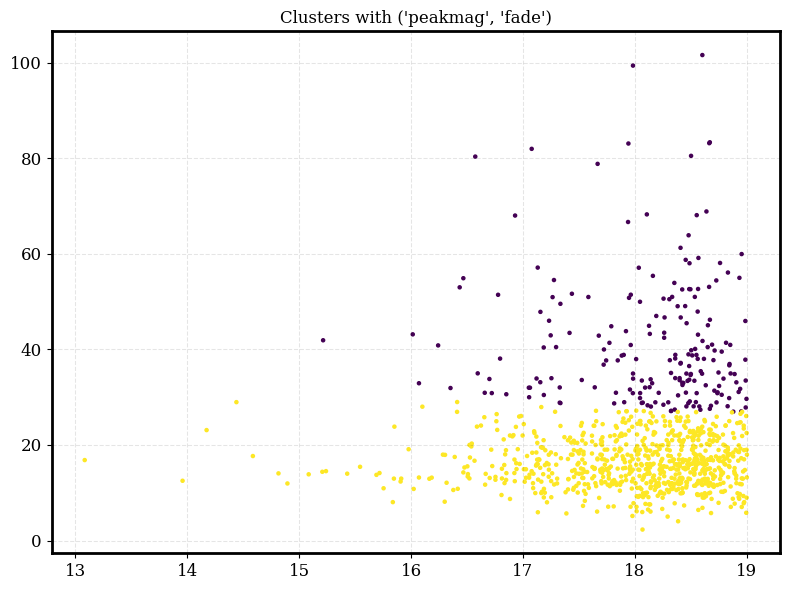

Accuracy with ('peakabs', 'duration'): 0.80


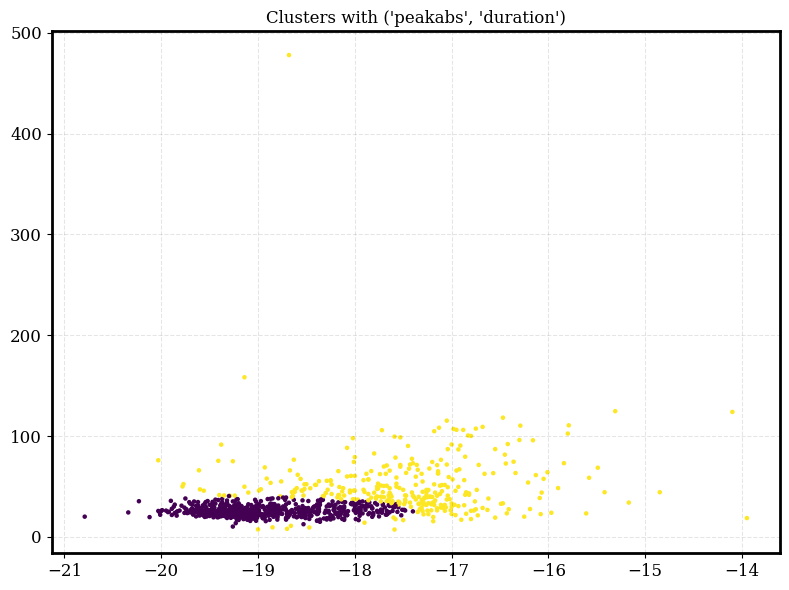

Accuracy with ('peakabs', 'rise'): 0.50


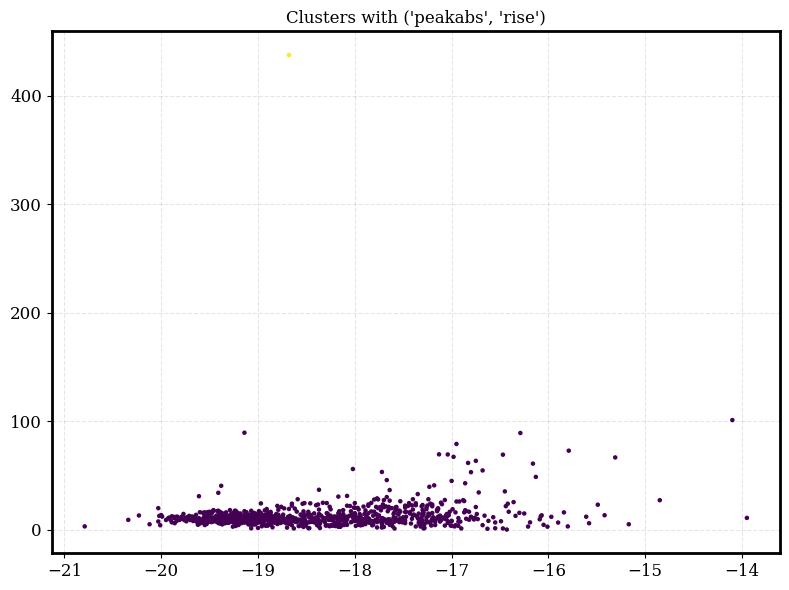

Accuracy with ('peakabs', 'fade'): 0.88


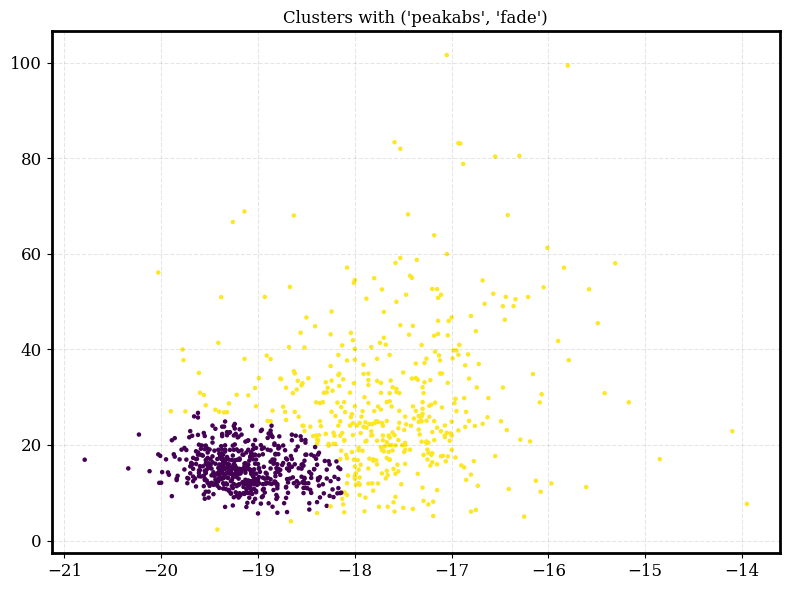

Accuracy with ('duration', 'rise'): 0.50


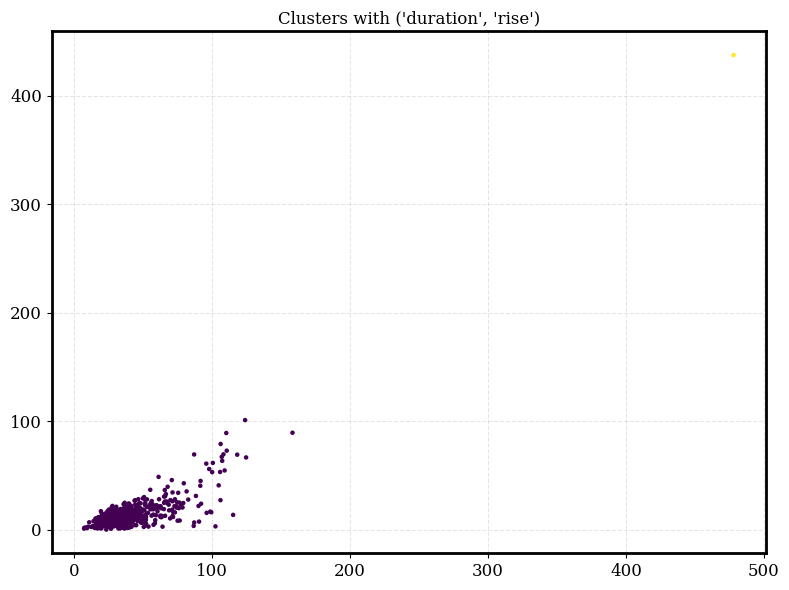

Accuracy with ('duration', 'fade'): 0.65


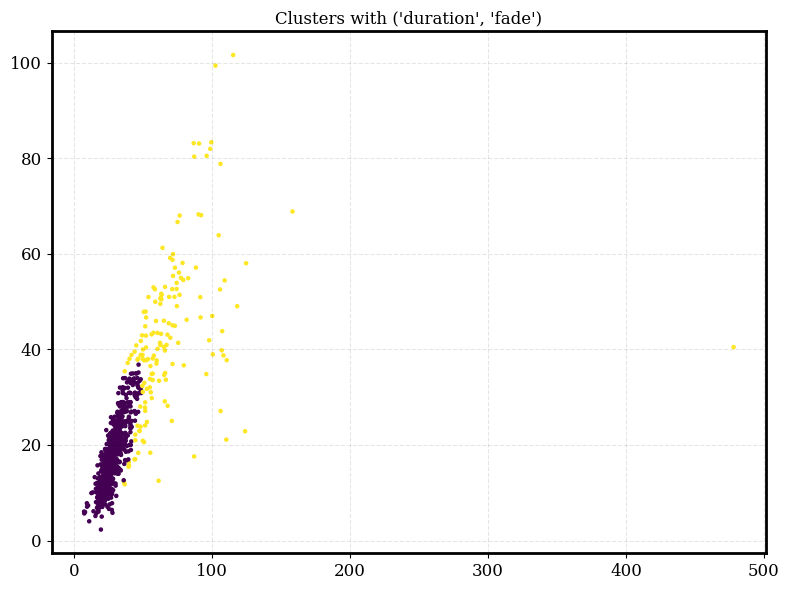

Accuracy with ('rise', 'fade'): 0.50


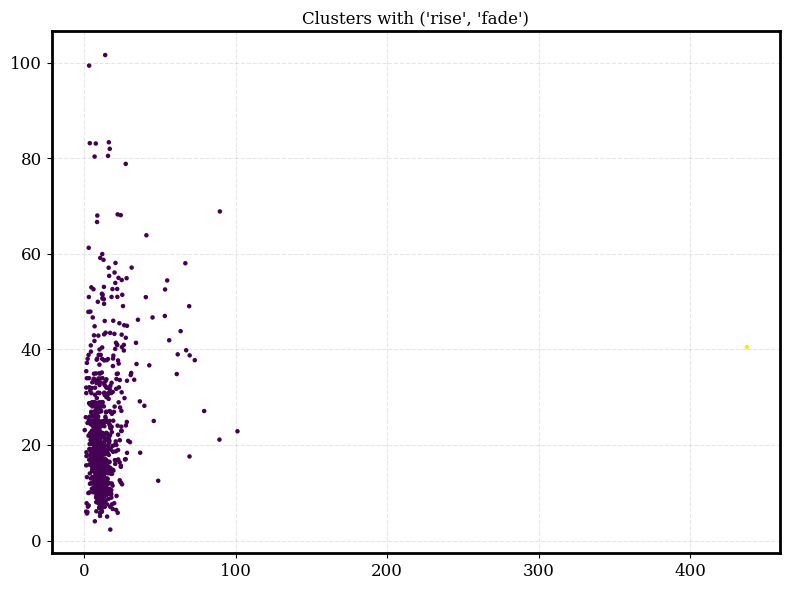

Best feature combination: ('peakabs', 'fade') with accuracy: 0.88


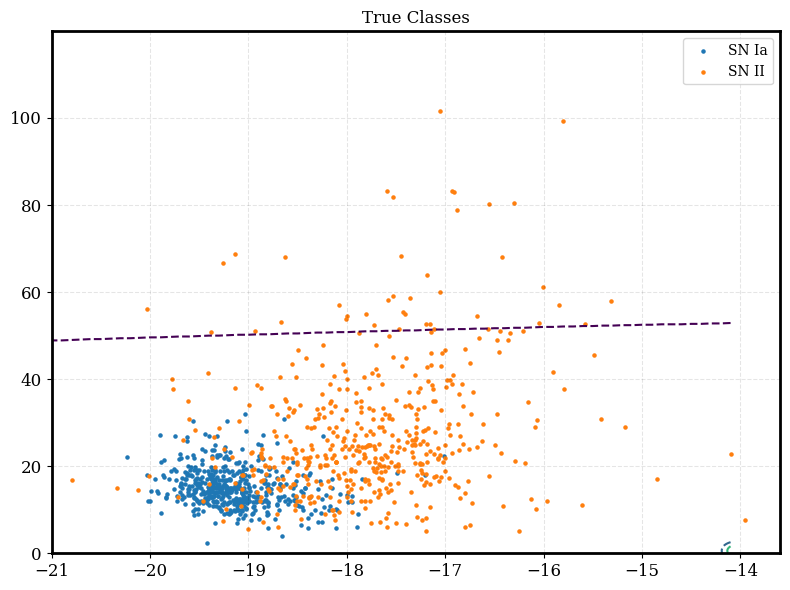

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from scipy.optimize import linear_sum_assignment
import itertools

# Function to plot a contour
def plot_contour(ax, center, cov, lvls=3, cmap='viridis'):
    x = np.arange(-21, -14, .1)
    y = np.arange(0, 120, .1)
    X, Y = np.meshgrid(x, y)
    xhat = center[0]
    yhat = center[1]
    sigx = cov[0][0]
    sigy = cov[1][1]
    A = (X - xhat) ** 2 / ((2 * sigx) ** 2)  # Ignoring covariance
    B = (Y - yhat) ** 2 / (2 * sigy ** 2)
    Z = np.exp(-(A + B))
    ax.contour(X, Y, Z, levels=lvls - 1, linestyles='dashed', cmap=cmap)

# Load and prepare data
# Example: relavant_data = pd.read_csv('your_data.csv')
filtered_data = data[['ZTFID', 'peakabs', 'fade', 'type', 'peakmag', 'duration', 'rise']]

# Encode true labels as integers
true_labels = filtered_data['type'].map({'SN Ia': 0, 'SN II': 1}).values

# Function to compute accuracy using best alignment
def compute_accuracy(true_labels, predicted_labels):
    D = np.zeros((2, 2), dtype=int)
    for i in range(len(true_labels)):
        D[true_labels[i], predicted_labels[i]] += 1
    row_ind, col_ind = linear_sum_assignment(-D)
    return D[row_ind, col_ind].sum() / len(true_labels)

# Function to fit GMM and compute accuracy for given features
def fit_gmm_and_plot(features):
    scaler = StandardScaler().fit(features)
    scaled_features = scaler.transform(features)
    model = GaussianMixture(n_components=2, random_state=0).fit(scaled_features)
    predicted_labels = model.predict(scaled_features)
    accuracy = compute_accuracy(true_labels, predicted_labels)
    return model, predicted_labels, accuracy

# Define the list of important features
important_features = ['peakmag', 'peakabs', 'duration', 'rise', 'fade']

# Generate all combinations of 2 features
combinations = list(itertools.combinations(important_features, 2))

# Store results
results = []

# Loop through each combination and fit GMM
for combo in combinations:
    features = filtered_data[list(combo)].astype(float)
    model, predicted_labels, accuracy = fit_gmm_and_plot(features)
    results.append((combo, accuracy))
    print(f"Accuracy with {combo}: {accuracy:.2f}")

    # Plot clusters with the current feature combination
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(features.iloc[:, 0], features.iloc[:, 1], c=predicted_labels, cmap='viridis', s=5)
    ax.set_title(f'Clusters with {combo}')
    plt.tight_layout()
    plt.show()

# Print the best combination
best_combo = max(results, key=lambda x: x[1])
print(f"Best feature combination: {best_combo[0]} with accuracy: {best_combo[1]:.2f}")

# Plot true classes and GMM clusters with contours for the best model
features = filtered_data[list(best_combo[0])].astype(float)
scaler = StandardScaler().fit(features)
scaled_features = scaler.transform(features)
model = GaussianMixture(n_components=2, random_state=0).fit(scaled_features)
predicted_labels = model.predict(scaled_features)

fig, ax = plt.subplots(figsize=(8, 6))
SN1a_data = filtered_data[filtered_data['type'] == 'SN Ia']
SN2_data = filtered_data[filtered_data['type'] == 'SN II']

ax.scatter(SN1a_data['peakabs'], SN1a_data['fade'], label='SN Ia', s=5)
ax.scatter(SN2_data['peakabs'], SN2_data['fade'], label='SN II', s=5)
ax.set_title('True Classes')
ax.legend()

means = model.means_
covariances = model.covariances_

for mean, cov in zip(means, covariances):
    plot_contour(ax, mean, cov)

plt.tight_layout()
plt.show()



In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from scipy.optimize import linear_sum_assignment
import itertools
from matplotlib.backends.backend_pdf import PdfPages

# Function to plot a contour
def plot_contour(ax, center, cov, lvls=3, cmap='viridis'):
    x = np.arange(-21, -14, .1)
    y = np.arange(0, 120, .1)
    X, Y = np.meshgrid(x, y)
    xhat = center[0]
    yhat = center[1]
    sigx = cov[0][0]
    sigy = cov[1][1]
    A = (X - xhat) ** 2 / ((2 * sigx) ** 2)  # Ignoring covariance
    B = (Y - yhat) ** 2 / (2 * sigy ** 2)
    Z = np.exp(-(A + B))
    ax.contour(X, Y, Z, levels=lvls - 1, linestyles='dashed', cmap=cmap)

# Load and prepare data
# Example: relavant_data = pd.read_csv('your_data.csv')
filtered_data = data[['ZTFID', 'peakabs', 'fade', 'type', 'peakmag', 'duration', 'rise']]

# Encode true labels as integers
true_labels = filtered_data['type'].map({'SN Ia': 0, 'SN II': 1}).values

# Function to compute accuracy using best alignment
def compute_accuracy(true_labels, predicted_labels):
    D = np.zeros((2, 2), dtype=int)
    for i in range(len(true_labels)):
        D[true_labels[i], predicted_labels[i]] += 1
    row_ind, col_ind = linear_sum_assignment(-D)
    return D[row_ind, col_ind].sum() / len(true_labels)

# Function to fit GMM and compute accuracy for given features
def fit_gmm_and_plot(features):
    scaler = StandardScaler().fit(features)
    scaled_features = scaler.transform(features)
    model = GaussianMixture(n_components=2, random_state=0).fit(scaled_features)
    predicted_labels = model.predict(scaled_features)
    accuracy = compute_accuracy(true_labels, predicted_labels)
    return model, predicted_labels, accuracy

# Define the list of important features
important_features = ['peakmag', 'peakabs', 'duration', 'rise', 'fade']

# Generate all combinations of 2 features
combinations = list(itertools.combinations(important_features, 2))

# Store results
results = []

# Create a PDF file
with PdfPages('clustering_results.pdf') as pdf:
    # Loop through each combination and fit GMM
    for combo in combinations:
        features = filtered_data[list(combo)].astype(float)
        model, predicted_labels, accuracy = fit_gmm_and_plot(features)
        results.append((combo, accuracy))
        print(f"Accuracy with {combo}: {accuracy:.2f}")

        # Plot clusters with the current feature combination
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.scatter(features.iloc[:, 0], features.iloc[:, 1], c=predicted_labels, cmap='viridis', s=5)
        ax.set_title(f'Clusters with {combo}')
        pdf.savefig(fig)  # Save the current figure to the PDF
        plt.close(fig)  # Close the figure to free memory

    # Print the best combination
    best_combo = max(results, key=lambda x: x[1])
    print(f"Best feature combination: {best_combo[0]} with accuracy: {best_combo[1]:.2f}")

    # Plot true classes and GMM clusters with contours for the best model
    features = filtered_data[list(best_combo[0])].astype(float)
    scaler = StandardScaler().fit(features)
    scaled_features = scaler.transform(features)
    model = GaussianMixture(n_components=2, random_state=0).fit(scaled_features)
    predicted_labels = model.predict(scaled_features)

    fig, ax = plt.subplots(figsize=(8, 6))
    SN1a_data = filtered_data[filtered_data['type'] == 'SN Ia']
    SN2_data = filtered_data[filtered_data['type'] == 'SN II']

    ax.scatter(SN1a_data['peakabs'], SN1a_data['fade'], label='SN Ia', s=5)
    ax.scatter(SN2_data['peakabs'], SN2_data['fade'], label='SN II', s=5)
    ax.set_title('True Classes')
    ax.legend()

    means = model.means_
    covariances = model.covariances_

    for mean, cov in zip(means, covariances):
        plot_contour(ax, mean, cov)

    pdf.savefig(fig)  # Save the final figure to the PDF
    plt.close(fig)  # Close the figure to free memory

    # Save results (feature combinations and accuracies) to the PDF
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.axis('off')
    results_text = '\n'.join([f"{combo}: {accuracy:.2f}" for combo, accuracy in results])
    ax.text(0.5, 0.5, f"Results:\n{results_text}\n\nBest combination: {best_combo[0]} with accuracy: {best_combo[1]:.2f}",
            ha='center', va='center', transform=ax.transAxes, fontsize=12)
    pdf.savefig(fig)
    plt.close(fig)  # Close the figure to free memory


Accuracy with ('peakmag', 'peakabs'): 0.86
Accuracy with ('peakmag', 'duration'): 0.50
Accuracy with ('peakmag', 'rise'): 0.50
Accuracy with ('peakmag', 'fade'): 0.69
Accuracy with ('peakabs', 'duration'): 0.80
Accuracy with ('peakabs', 'rise'): 0.50
Accuracy with ('peakabs', 'fade'): 0.88
Accuracy with ('duration', 'rise'): 0.50
Accuracy with ('duration', 'fade'): 0.65
Accuracy with ('rise', 'fade'): 0.50
Best feature combination: ('peakabs', 'fade') with accuracy: 0.88
